In [144]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import yfinance as yf
from datetime import datetime

warnings.filterwarnings("ignore")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [38]:
# список активов
name_share = ['AAPL', 'NVDA', 'MSFT'] # Акции SP500 для анализа
name_crypto = ['BTC', 'ETH', 'SOL', 'XRP'] # Криптовалюты для анализа

# Период для загрузки данных
start = '2023-01-01'
end = datetime.strftime(datetime.now(), format='%Y-%m-%d')
print(end)

2024-11-29


# Акции

In [108]:
# загружаем данные
df_share = pd.DataFrame([])
for name in name_share:
    df = yf.download(name, start=start, end=end, interval='1h', multi_level_index=False) # Загрузим часовые данные

    df['Close_CH'] = df['Close'] - df['Close'].shift(periods=1) # Добавим колонку с разницей цены Close к предыдущему часу

    renaming_dict = {}
    for i in range(len(df.columns)):
        renaming_dict[f'{df.columns[i]}'] = f'{df.columns[i]}_{name}' # Переименуем названия колонок, добавив имя актива
        df.rename(columns=renaming_dict, inplace=True)
    
    df_share = pd.concat([df_share, df], join='outer', axis=1)
df_share

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close_AAPL,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Close_CH_AAPL,Adj Close_NVDA,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA,Close_CH_NVDA,Adj Close_MSFT,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,Volume_MSFT,Close_CH_MSFT
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-03 14:30:00+00:00,125.459999,125.459999,130.899994,125.230003,130.279999,27775505,NaN,14.352000,14.352000,14.996000,14.307001,14.851000,11605646,NaN,239.788101,239.788101,245.750000,239.340103,243.080002,6337273,NaN
2023-01-03 15:30:00+00:00,125.345001,125.345001,125.870003,124.730003,125.459999,18104999,-0.114998,14.196001,14.196001,14.357000,14.103010,14.353000,7234854,-0.155999,238.360001,238.360001,239.830002,237.500000,239.800003,3058832,-1.428101
2023-01-03 16:30:00+00:00,124.660004,124.660004,125.370003,124.349098,125.350197,11248777,-0.684998,14.183009,14.183009,14.261000,14.096001,14.195000,4647010,-0.012992,238.150101,238.150101,238.690002,237.500000,238.369995,2236397,-0.209900
2023-01-03 17:30:00+00:00,124.649902,124.649902,124.940002,124.190002,124.660004,8860080,-0.010101,14.278999,14.278999,14.286000,14.157001,14.185000,3367135,0.095990,238.440002,238.440002,238.990005,237.399994,238.179993,2596124,0.289902
2023-01-03 18:30:00+00:00,124.570000,124.570000,125.000000,124.190002,124.669899,8388062,-0.079903,14.227170,14.227170,14.286310,14.203000,14.280009,3274138,-0.051829,238.550003,238.550003,238.949997,238.050003,238.449997,1635805,0.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-27 16:30:00+00:00,234.570007,234.570007,234.889999,233.979996,234.620102,2845831,-0.099991,132.595001,132.595001,132.789993,131.899994,132.410004,20553359,0.180008,423.869995,423.869995,425.005005,423.279999,424.529999,1102404,-0.705017
2024-11-27 17:30:00+00:00,234.780106,234.780106,235.000000,234.409393,234.559998,2325512,0.210098,133.659897,133.659897,133.659897,132.229996,132.589996,17619519,1.064896,423.750000,423.750000,424.200012,423.170013,423.859985,882423,-0.119995
2024-11-27 18:30:00+00:00,234.979996,234.979996,235.137100,234.710007,234.779999,1683157,0.199890,134.149994,134.149994,134.570007,133.619995,133.650894,19717594,0.490097,424.378510,424.378510,424.649994,423.700012,423.730011,978304,0.628510


In [109]:
df_share.columns

Index(['Adj Close_AAPL', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL',
       'Volume_AAPL', 'Close_CH_AAPL', 'Adj Close_NVDA', 'Close_NVDA',
       'High_NVDA', 'Low_NVDA', 'Open_NVDA', 'Volume_NVDA', 'Close_CH_NVDA',
       'Adj Close_MSFT', 'Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT',
       'Volume_MSFT', 'Close_CH_MSFT'],
      dtype='object')

In [110]:
df_share.shape

(3348, 21)

In [111]:
# Проверим на пропуски
df_share.isnull().sum()

Adj Close_AAPL    0
Close_AAPL        0
High_AAPL         0
Low_AAPL          0
Open_AAPL         0
Volume_AAPL       0
Close_CH_AAPL     1
Adj Close_NVDA    0
Close_NVDA        0
High_NVDA         0
Low_NVDA          0
Open_NVDA         0
Volume_NVDA       0
Close_CH_NVDA     1
Adj Close_MSFT    0
Close_MSFT        0
High_MSFT         0
Low_MSFT          0
Open_MSFT         0
Volume_MSFT       0
Close_CH_MSFT     1
dtype: int64

In [ ]:
# Удалим строки с пустыми значениями
df_share = df_share.dropna()

In [113]:
df_share.isnull().sum()

Adj Close_AAPL    0
Close_AAPL        0
High_AAPL         0
Low_AAPL          0
Open_AAPL         0
Volume_AAPL       0
Close_CH_AAPL     0
Adj Close_NVDA    0
Close_NVDA        0
High_NVDA         0
Low_NVDA          0
Open_NVDA         0
Volume_NVDA       0
Close_CH_NVDA     0
Adj Close_MSFT    0
Close_MSFT        0
High_MSFT         0
Low_MSFT          0
Open_MSFT         0
Volume_MSFT       0
Close_CH_MSFT     0
dtype: int64

In [114]:
# Посмотрим основные статистики по датасету за последнее время
df_share[-100:].describe()

,Adj Close_AAPL,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Close_CH_AAPL,Adj Close_NVDA,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA,Close_CH_NVDA,Adj Close_MSFT,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,Volume_MSFT,Close_CH_MSFT
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,228.267265,228.267265,228.857710,227.661492,228.150217,4.292309e+06,0.078900,143.067509,143.067509,143.989642,142.270471,143.222077,2.901870e+07,-0.124900,419.472557,419.472557,420.687732,418.262758,419.403521,2.078616e+06,-0.022598
std,3.472896,3.472896,3.421577,3.483335,3.437769,2.336028e+06,1.046449,4.542128,4.542128,4.625322,4.502444,4.564520,2.224479e+07,1.475876,4.966610,4.966610,4.911120,4.955948,4.903207,1.188575e+06,1.921712
min,222.195007,222.195007,222.460007,221.500000,222.190002,1.602064e+06,-4.355011,132.359894,132.359894,132.789993,131.899994,132.378098,9.951775e+06,-4.733994,411.207886,411.207886,413.579895,410.288696,411.114990,8.824230e+05,-9.080109
25%,225.336395,225.336395,226.320320,224.872501,225.223251,2.873390e+06,-0.302639,140.092495,140.092495,141.322079,139.463249,140.100002,1.602338e+07,-0.587475,415.152512,415.152512,416.215279,414.157501,415.131248,1.269558e+06,-0.940697
50%,228.080002,228.080002,228.715004,227.012505,227.752502,3.648384e+06,0.095001,144.544601,144.544601,145.437500,143.325005,144.617401,2.183831e+07,-0.067505,418.485001,418.485001,419.710007,416.835052,418.799988,1.653333e+06,0.112640
75%,229.779995,229.779995,230.149994,229.280003,229.613377,4.611278e+06,0.550003,146.998753,146.998753,147.639999,146.269997,147.094227,2.956963e+07,0.614101,423.939995,423.939995,424.926247,423.007042,423.939987,2.471406e+06,0.814995
max,235.160004,235.160004,235.690002,234.735001,235.160004,1.297963e+07,3.180008,149.220001,149.220001,152.889999,148.059998,149.315002,1.613086e+08,3.940002,428.391510,428.391510,429.325012,427.470001,428.380005,6.660048e+06,5.927490


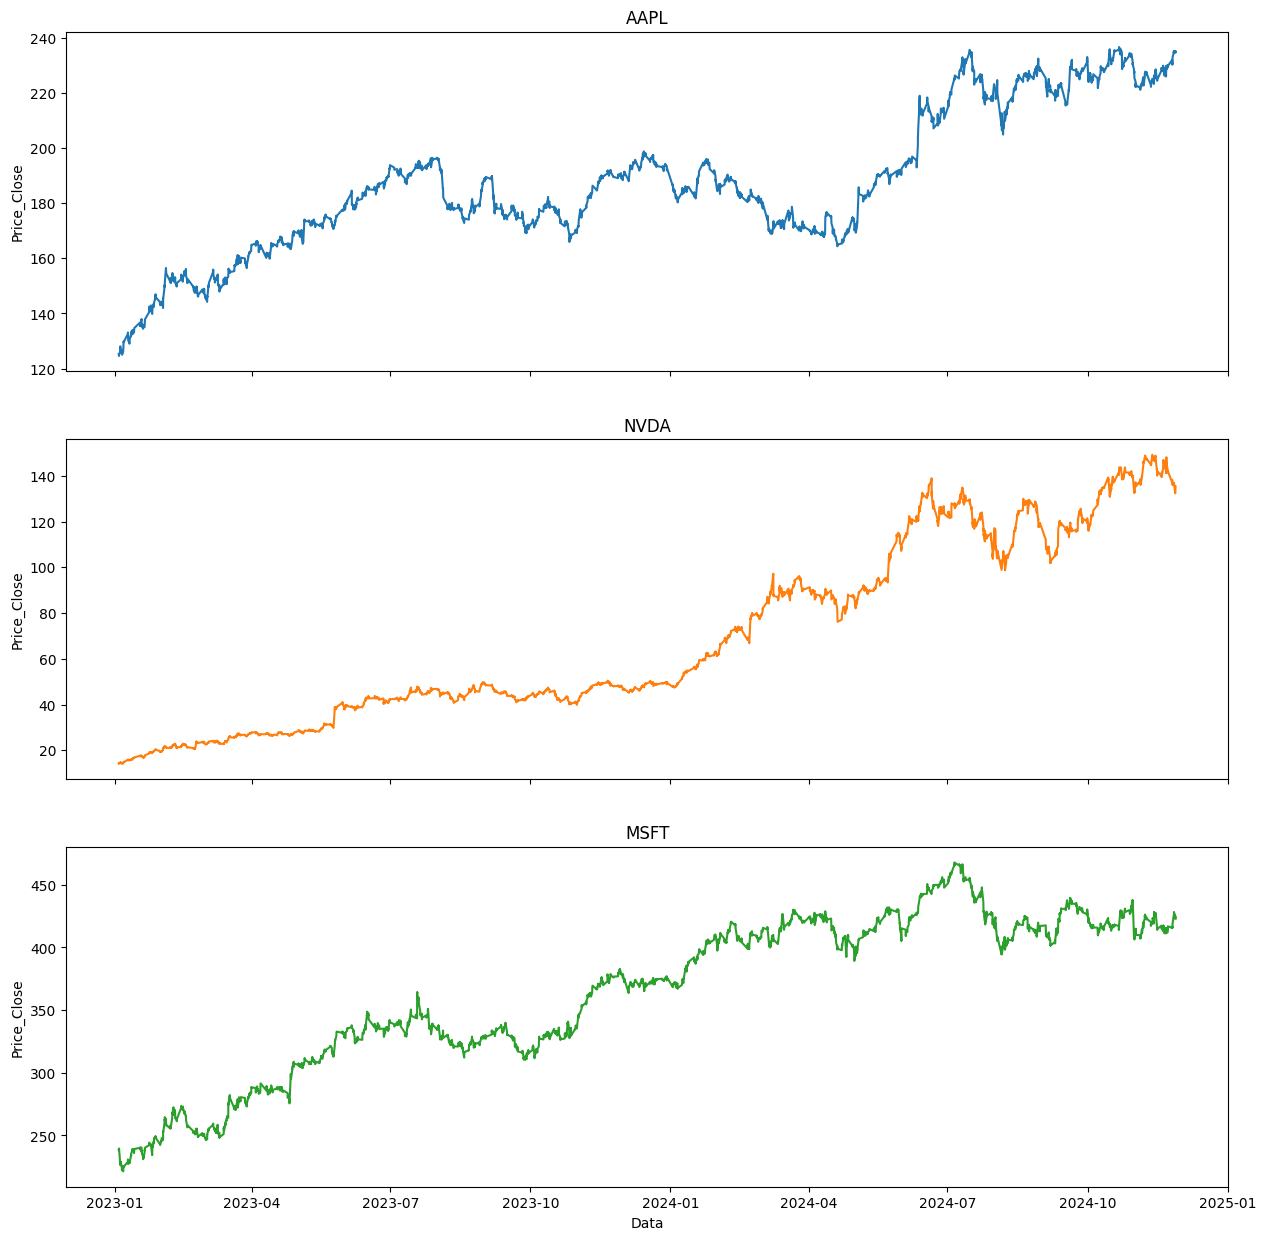

In [116]:
# Построим графики цен Close

colors = ['blue', 'orange', 'green',]

fig, axs = plt.subplots(3, 1, figsize=(15,15))

for i in range(3):
    column = name_share[i]
    color = colors[i]
    axs[i].plot(df_share.index, df_share[f'Close_{column}'], color=f'tab:{color}' )
    axs[i].set_title(column)


for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price_Close')

for ax in axs.flat:
    ax.label_outer()

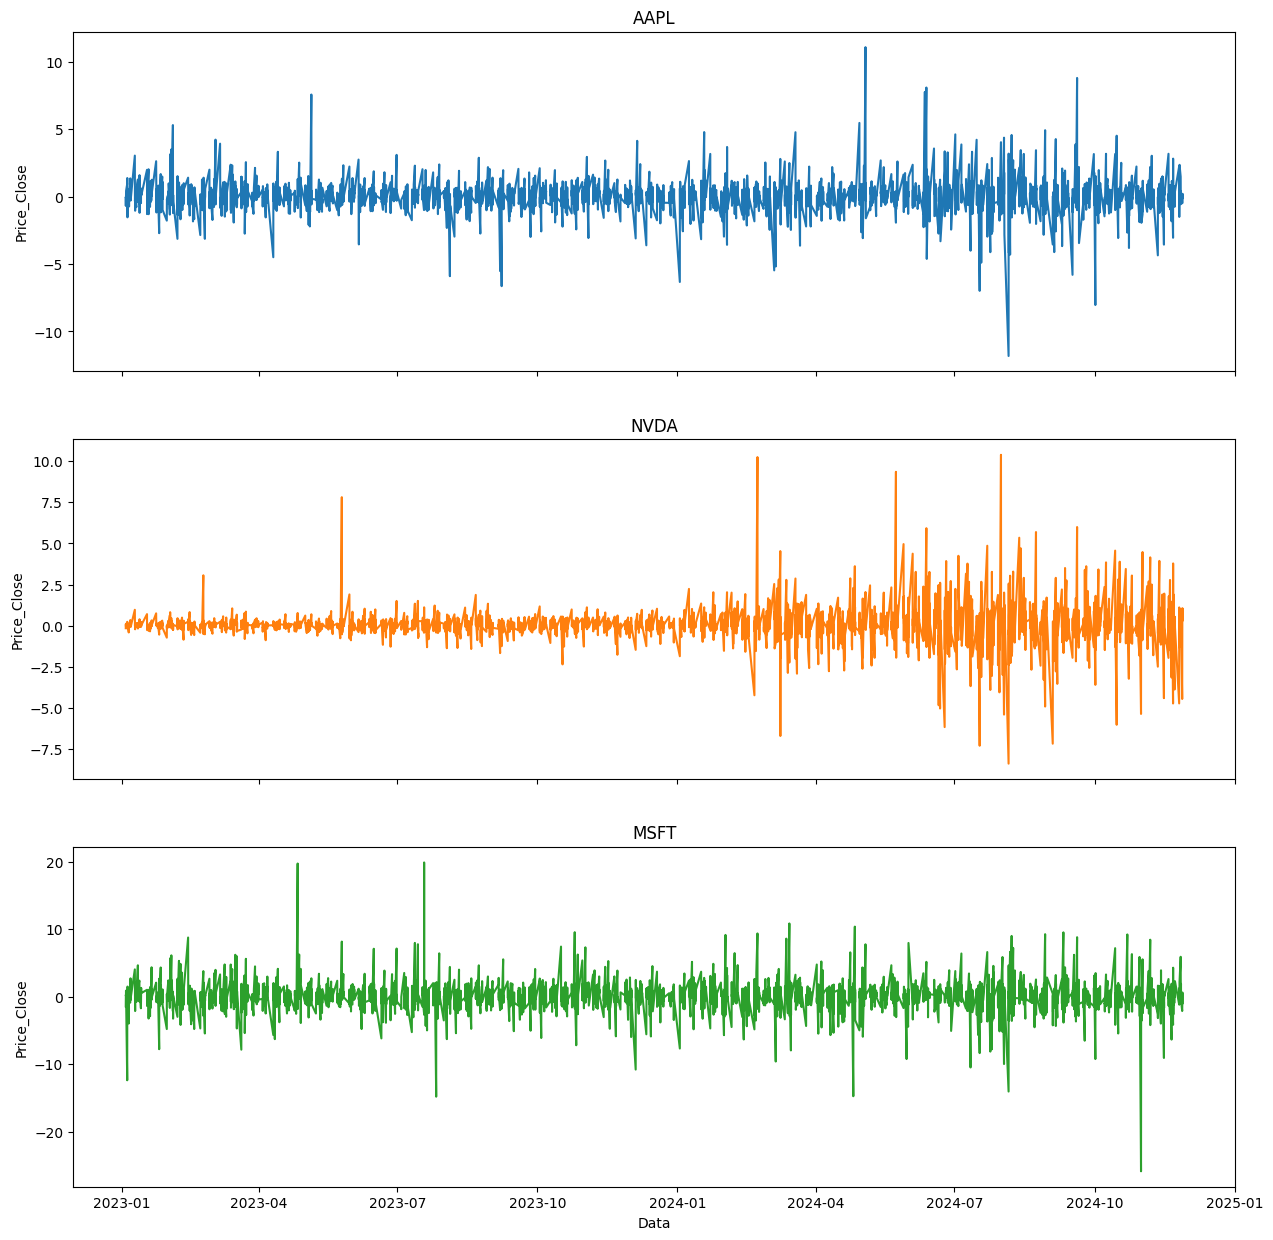

In [117]:
# Посмотрим на график изменения цены

fig, axs = plt.subplots(3, 1, figsize=(15,15))

for i in range(3):
    column = name_share[i]
    color = colors[i]
    axs[i].plot(df_share.index, df_share[f'Close_CH_{column}'], color=f'tab:{color}' )
    axs[i].set_title(column)


for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price_Close')

for ax in axs.flat:
    ax.label_outer()

### Видим, что по акциям NVDA и AAPL волатильность увеличилась в конце периода

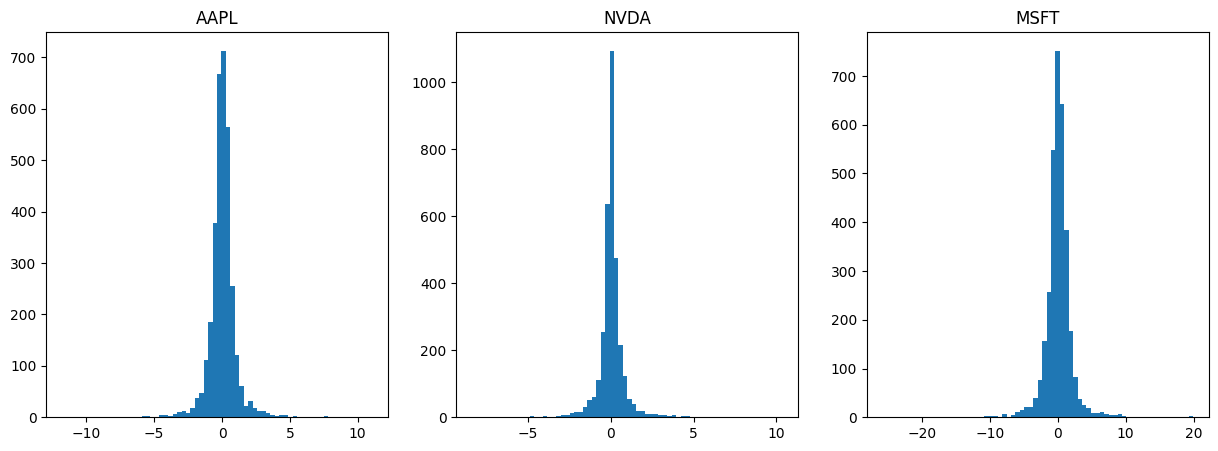

In [157]:
# Построим гистограмму распределения изменений цены Close

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for i in range(3):
    column = name_share[i]
    axs[i].hist(df_share[f'Close_CH_{column}'], bins=70)
    axs[i].set_title(column)

In [156]:
for i in range(len(name_share)):
    fig = px.histogram(df_share, x=[f'Close_CH_{name_share[i]}'], title=name_share[i], marginal="violin", # or violin, rug)
                    )
    fig.show()


Имеются выюросы, однако это часть данных, с ними надо работать

# Криптовалюты

In [160]:
!pip install ccxt
from IPython.display import clear_output

clear_output()

import ccxt

In [219]:
# загружаем данные

exchange = ccxt.binance()
df_crypto = pd.DataFrame([])

for name in name_crypto:
    ohlcv = exchange.fetch_ohlcv(f'{name}/USDT', '1h', limit=3000)
    df = pd.DataFrame(ohlcv, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df.index = pd.to_datetime(df['date'], unit='ms')
    del df['date']
    df['close_CH'] = df['close'] - df['close'].shift(periods=1) # Добавим колонку с разницей цены Close к предыдущему часу

    renaming_dict = {}
    for i in range(len(df.columns)):
        renaming_dict[f'{df.columns[i]}'] = f'{df.columns[i]}_{name}' # Переименуем названия колонок, добавив имя актива
        df.rename(columns=renaming_dict, inplace=True)
    
    df_crypto = pd.concat([df_crypto, df], join='outer', axis=1)
df_crypto

,open_BTC,high_BTC,low_BTC,close_BTC,volume_BTC,close_CH_BTC,open_ETH,high_ETH,low_ETH,close_ETH,volume_ETH,close_CH_ETH,open_SOL,high_SOL,low_SOL,close_SOL,volume_SOL,close_CH_SOL,open_XRP,high_XRP,low_XRP,close_XRP,volume_XRP,close_CH_XRP
date,,,,,,,,,,,,,,,,,,,,,,,,
2024-10-18 22:00:00,68412.00,68420.00,68204.10,68205.60,430.32404,NaN,2642.49,2642.77,2633.59,2636.46,6778.6479,NaN,154.36,154.40,153.87,154.29,35108.756,NaN,0.5457,0.5467,0.5450,0.5452,2332875.00,NaN
2024-10-18 23:00:00,68205.59,68470.00,68205.59,68428.00,307.31425,222.40,2636.46,2644.78,2636.13,2642.17,5746.9296,5.71,154.29,155.18,154.26,154.94,37481.082,0.65,0.5451,0.5468,0.5450,0.5465,2071823.00,0.0013
2024-10-19 00:00:00,68427.99,68480.00,68303.03,68334.20,310.84184,-93.80,2642.17,2643.40,2636.00,2639.70,5035.4039,-2.47,154.93,155.10,154.40,154.54,36435.408,-0.40,0.5465,0.5469,0.5453,0.5457,3668853.00,-0.0008
2024-10-19 01:00:00,68334.21,68454.55,68330.00,68340.02,321.83758,5.82,2639.70,2646.00,2635.31,2635.89,5764.6777,-3.81,154.55,155.00,154.37,154.38,32390.973,-0.16,0.5458,0.5474,0.5456,0.5467,4059324.00,0.0010
2024-10-19 02:00:00,68340.02,68469.91,68334.00,68459.59,276.07774,119.57,2635.90,2648.40,2635.22,2647.11,4982.2942,11.22,154.38,155.04,154.20,155.00,91594.740,0.62,0.5467,0.5500,0.5460,0.5485,9202640.00,0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-29 09:00:00,95980.00,96482.61,95870.71,96355.39,851.51172,375.40,3568.88,3579.00,3560.50,3568.35,9835.8540,-0.53,238.98,240.86,238.74,240.42,89523.095,1.44,1.6114,1.6408,1.5999,1.6312,34111813.00,0.0198
2024-11-29 10:00:00,96355.39,96849.00,96293.61,96844.01,1116.53171,488.62,3568.35,3584.88,3562.05,3584.88,15952.2749,16.53,240.42,241.80,240.26,241.77,93518.269,1.35,1.6313,1.6833,1.6295,1.6634,70815533.09,0.0322
2024-11-29 11:00:00,96844.00,97358.21,96548.00,97237.91,1444.65653,393.90,3584.87,3599.66,3572.80,3594.74,17276.2677,9.86,241.77,245.49,241.47,245.22,171843.329,3.45,1.6634,1.6745,1.6420,1.6529,38560735.00,-0.0105


In [220]:
df_crypto.columns

Index(['open_BTC', 'high_BTC', 'low_BTC', 'close_BTC', 'volume_BTC',
       'close_CH_BTC', 'open_ETH', 'high_ETH', 'low_ETH', 'close_ETH',
       'volume_ETH', 'close_CH_ETH', 'open_SOL', 'high_SOL', 'low_SOL',
       'close_SOL', 'volume_SOL', 'close_CH_SOL', 'open_XRP', 'high_XRP',
       'low_XRP', 'close_XRP', 'volume_XRP', 'close_CH_XRP'],
      dtype='object')

In [221]:
df_crypto.shape

(1000, 24)

In [222]:
df_crypto.isnull().sum()

open_BTC        0
high_BTC        0
low_BTC         0
close_BTC       0
volume_BTC      0
close_CH_BTC    1
open_ETH        0
high_ETH        0
low_ETH         0
close_ETH       0
volume_ETH      0
close_CH_ETH    1
open_SOL        0
high_SOL        0
low_SOL         0
close_SOL       0
volume_SOL      0
close_CH_SOL    1
open_XRP        0
high_XRP        0
low_XRP         0
close_XRP       0
volume_XRP      0
close_CH_XRP    1
dtype: int64

In [223]:
df_crypto = df_crypto.dropna()

In [224]:
df_crypto[-100:].describe()

,open_BTC,high_BTC,low_BTC,close_BTC,volume_BTC,close_CH_BTC,open_ETH,high_ETH,low_ETH,close_ETH,volume_ETH,close_CH_ETH,open_SOL,high_SOL,low_SOL,close_SOL,volume_SOL,close_CH_SOL,open_XRP,high_XRP,low_XRP,close_XRP,volume_XRP,close_CH_XRP
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,94794.559100,95177.853100,94382.473100,94779.146400,1789.716958,-15.409500,3489.806700,3510.573200,3468.486600,3490.982600,29735.140059,1.177800,237.241800,238.737800,235.400100,237.123000,167520.309430,-0.118900,1.457157,1.476106,1.441382,1.458991,2.951837e+07,0.001838
std,1642.849079,1562.557125,1685.190973,1614.793859,1143.065112,541.924456,106.437719,104.925693,109.852123,106.952143,19396.829360,25.269877,5.629112,5.360028,5.598216,5.374773,110369.911199,2.030901,0.071381,0.073266,0.074587,0.075009,1.964015e+07,0.020476
min,91036.000000,91919.830000,90791.100000,91036.010000,515.373680,-2082.810000,3282.310000,3300.800000,3252.000000,3282.310000,8325.890300,-68.640000,225.910000,228.500000,221.800000,225.900000,38397.761000,-6.980000,1.327200,1.344500,1.283300,1.327100,9.079191e+06,-0.043900
25%,93514.705000,93813.935000,92979.960000,93514.712500,1010.851630,-290.890000,3414.020000,3436.912500,3393.130000,3414.017500,17201.770100,-14.600000,233.915000,235.630000,232.227500,233.912500,102805.003500,-1.470000,1.413375,1.433525,1.388400,1.413325,1.653095e+07,-0.010725
50%,95053.575000,95382.630000,94813.260000,95053.565000,1422.739630,-32.425000,3501.280000,3527.900000,3464.065000,3503.395000,24814.869900,-0.595000,237.535000,238.710000,235.620000,237.545000,128701.318500,-0.080000,1.463650,1.472500,1.439200,1.463700,2.271078e+07,0.001150
75%,95914.002500,96372.585000,95604.022500,95914.000000,2186.862303,360.055000,3584.082500,3599.315000,3565.290000,3585.207500,34443.294750,16.710000,240.080000,241.542500,238.657500,240.082500,202291.709500,1.300000,1.479300,1.493175,1.466825,1.479325,3.730334e+07,0.016550
max,98492.950000,98680.940000,98203.410000,98319.340000,7077.150910,1216.430000,3665.900000,3684.920000,3650.790000,3665.900000,134055.238500,110.670000,254.830000,255.670000,253.090000,253.900000,769568.448000,4.400000,1.663400,1.703100,1.651000,1.692600,1.198162e+08,0.049300


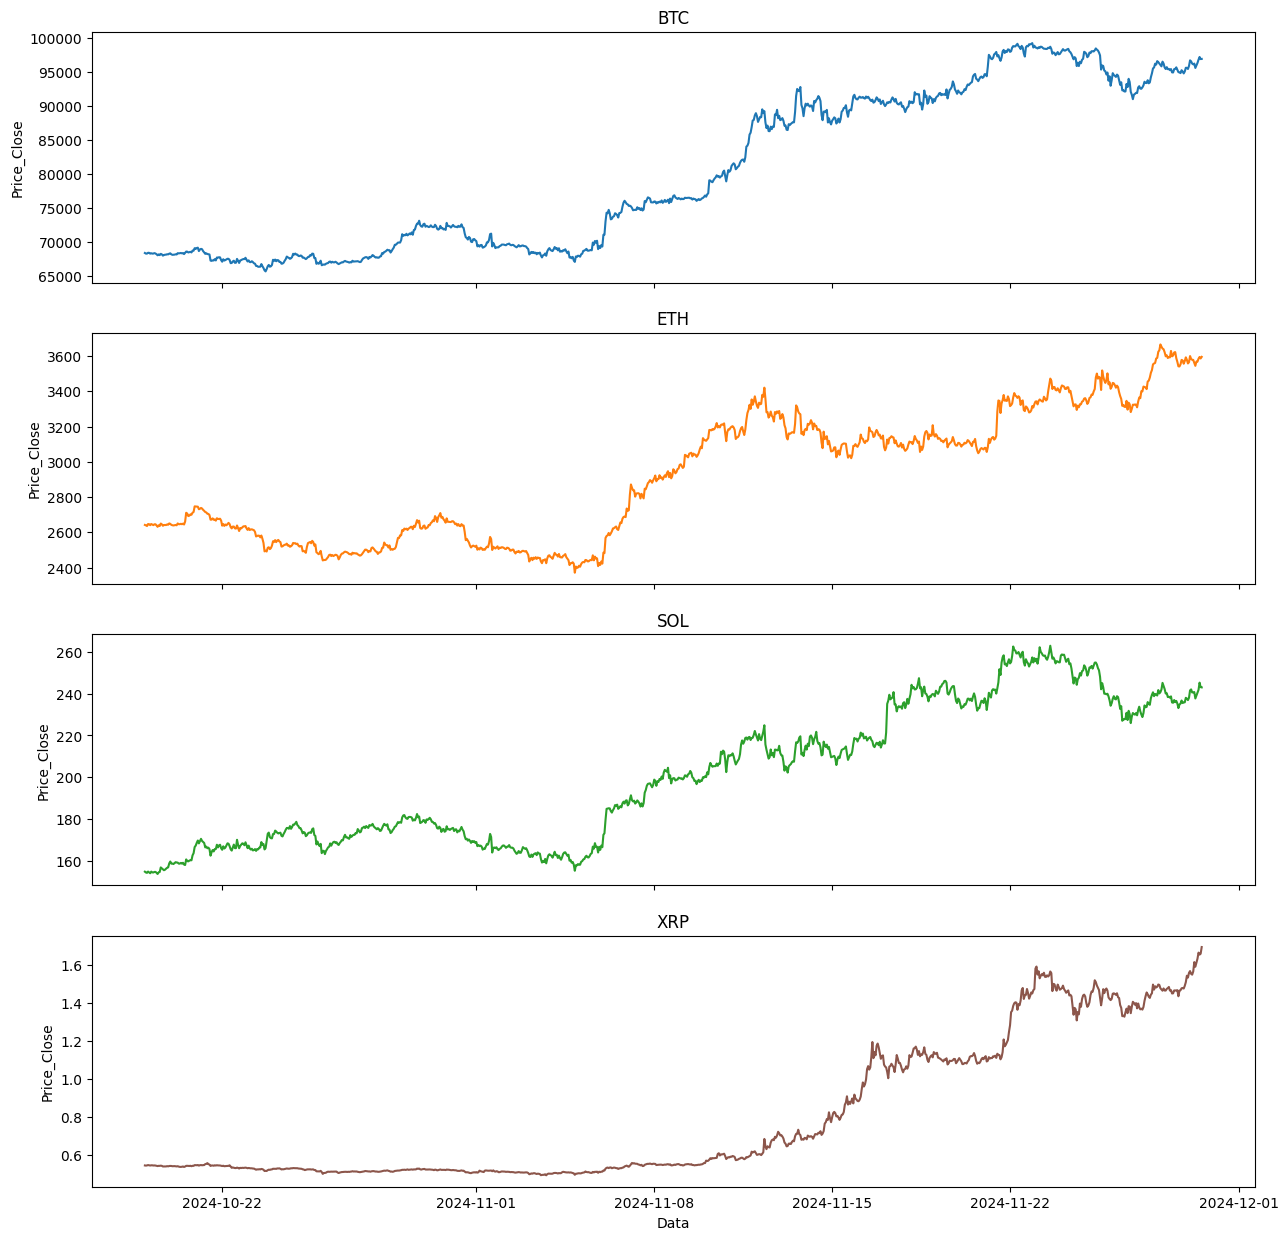

In [225]:
# Построим графики цен Close

colors = ['blue', 'orange', 'green', 'brown']

fig, axs = plt.subplots(4, 1, figsize=(15,15))

for i in range(4):
    column = name_crypto[i]
    color = colors[i]
    axs[i].plot(df_crypto.index, df_crypto[f'close_{column}'], color=f'tab:{color}' )
    axs[i].set_title(column)


for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price_Close')

for ax in axs.flat:
    ax.label_outer()

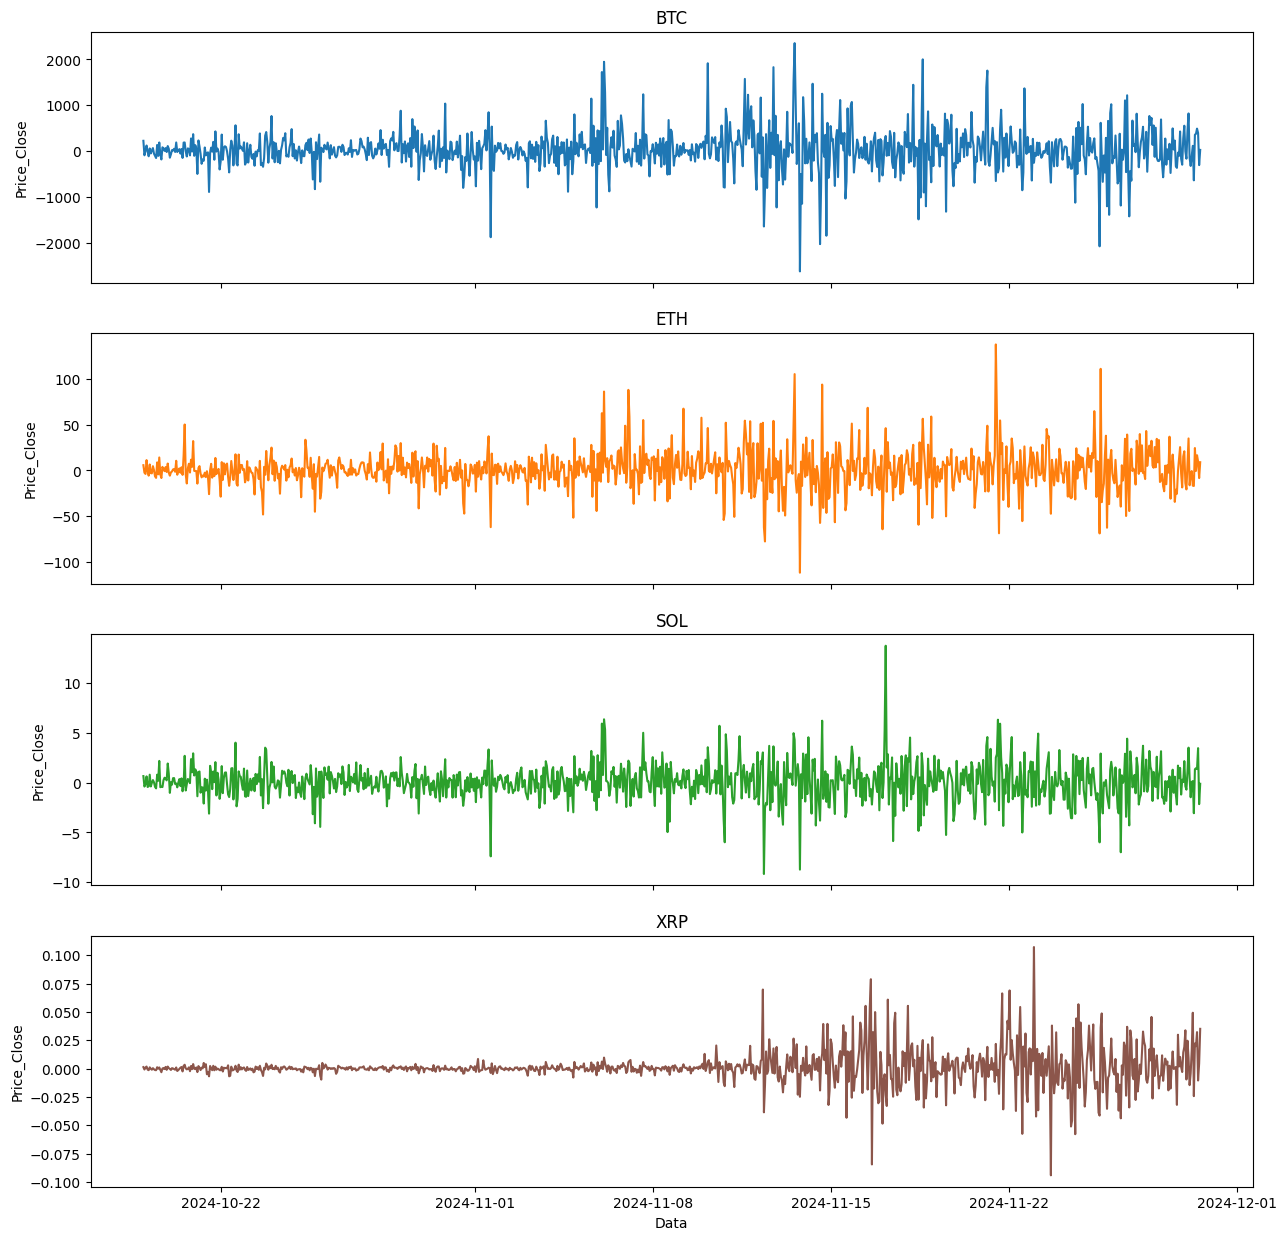

In [226]:
fig, axs = plt.subplots(4, 1, figsize=(15,15))

for i in range(4):
    column = name_crypto[i]
    color = colors[i]
    axs[i].plot(df_crypto.index, df_crypto[f'close_CH_{column}'], color=f'tab:{color}' )
    axs[i].set_title(column)


for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price_Close')

for ax in axs.flat:
    ax.label_outer()

### Видим, что по всем криптовалютам волатильность увеличилась в середине периода. Особенно сильно увеличилась на XRP

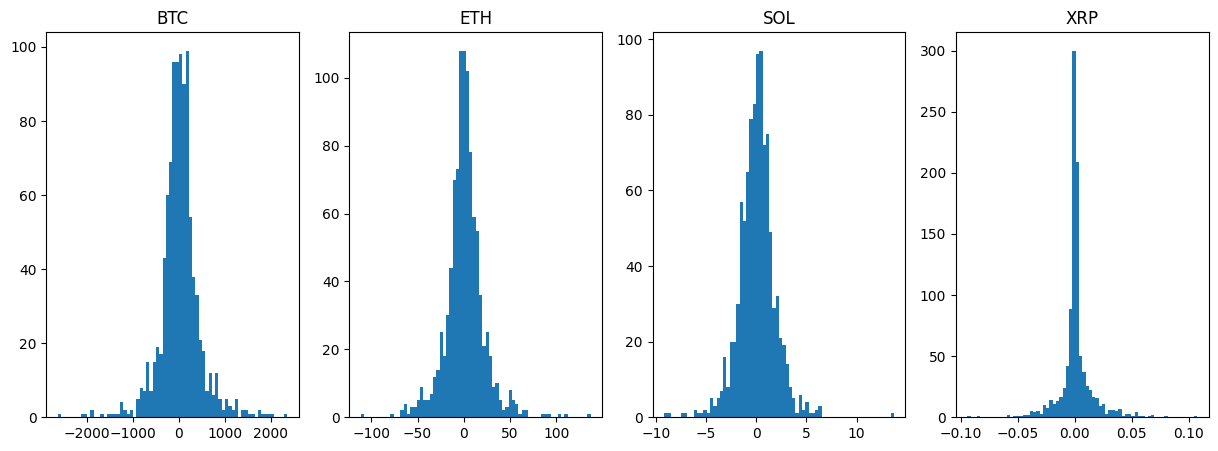

In [227]:
# Построим гистограмму распределения изменений цены Close

fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i in range(4):
    column = name_crypto[i]
    axs[i].hist(df_crypto[f'close_CH_{column}'], bins=70)
    axs[i].set_title(column)

In [228]:
for i in range(len(name_crypto)):
    fig = px.histogram(df_crypto, x=[f'close_CH_{name_crypto[i]}'], title=name_crypto[i], marginal="violin", # or violin, rug)
                    )
    fig.show()

Имеются выюросы, однако это часть данных, с ними надо работать. По XRP распределение сильно сконцентрировано в центре, но это из-за низкого разброса в цене в начале периода.